# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
outliers_fresh = dict(customers["Fresh"][customers["Fresh"] > customers["Fresh"].mean() + 3 * customers["Fresh"].std()])
outliers_milk = dict(customers["Milk"][customers["Milk"] > customers["Milk"].mean() + 3 * customers["Milk"].std()])
outliers_grocery = dict(customers["Grocery"][customers["Grocery"] > customers["Grocery"].mean() + 3 * customers["Grocery"].std()])
outliers_frozen = dict(customers["Frozen"][customers["Frozen"] > customers["Frozen"].mean() + 3 * customers["Frozen"].std()])
outliers_detergents = dict(customers["Detergents_Paper"][customers["Detergents_Paper"] > customers["Detergents_Paper"].mean() + 3 * customers["Detergents_Paper"].std()])
outliers_delicassen = dict(customers["Delicassen"][customers["Delicassen"] > customers["Delicassen"].mean() + 3 * customers["Delicassen"].std()])
print(outliers_fresh)
print(outliers_milk)
print(outliers_grocery)
print(outliers_frozen)
print(outliers_detergents)
print(outliers_delicassen)

{39: 56159, 103: 56082, 125: 76237, 181: 112151, 258: 56083, 259: 53205, 284: 68951}
{23: 36423, 47: 54259, 56: 29892, 61: 38369, 85: 46197, 86: 73498, 181: 29627, 183: 43950, 211: 28326}
{47: 55571, 61: 59598, 65: 45828, 85: 92780, 211: 39694, 216: 36486, 333: 67298}
{93: 35009, 103: 18028, 183: 36534, 196: 18711, 325: 60869, 413: 17866}
{47: 24171, 56: 17740, 61: 26701, 65: 24231, 85: 40827, 86: 20070, 92: 18906, 211: 19410, 251: 18594, 333: 38102}
{23: 16523, 71: 14472, 87: 14351, 183: 47943}


In [8]:
customers.skew(axis = 0)

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [9]:
# Your observations here
# Significado de cada columna:
# 1. FRESH: annual spending (m.u.) on fresh products (Continuous); 
# 2. MILK: annual spending (m.u.) on milk products (Continuous); 
# 3. GROCERY: annual spending (m.u.)on grocery products (Continuous); 
# 4. FROZEN: annual spending (m.u.)on frozen products (Continuous) 
# 5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
# 6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
# 7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
# 8. REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 
# Region y chanel son datos categóricos, no hay valores nulos, hay una alta correlación entre Grocery y Detergents_Paper
# En todas las columnas excepto en las de chanel y region hay outliers
# Todas las columnas numéricas presentan una asimetría estadística. La más pronunciada Delicassen

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Your code here
# En un principio había borrado esta columna, pero luego he visto que el ejercicio al final la tenía en cuenta
# clean_data = customers.drop(["Grocery"], axis=1)

In [11]:
print(customers["Channel"].value_counts())
print(customers["Region"].value_counts())

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


In [12]:
customers["Channel"] = customers["Channel"].astype(str)
customers["Region"] = customers["Region"].astype(str)

In [13]:
customers = pd.get_dummies(customers)
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [14]:
# Your comment here
# Get dummies para las dos columnas categóricas

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

In [16]:
# Your code here:
# No sé si aquí habría que omitir o no las columnas dummies. Las he omitido y luego las he vuelto a añadir

scaler = StandardScaler()
columns = list(customers)[:-5]
columns_dummies = list(customers)[6:]

data = customers[columns]

customers_scale = scaler.fit(data)
customers_scale = scaler.transform(data)


customers_scale = pd.DataFrame(customers_scale, columns=columns)
data_dummies = customers[columns_dummies]
customers_scale = pd.concat([customers_scale, data_dummies], axis=1)
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,1,0,0,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,1,0,0,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,1,0,0,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0,0,0,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,1,0,0,1


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [23]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(customers_scale)
labels = kmeans.labels_

In [24]:
customers_scale["labels"] = labels

In [25]:
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,1,0,0,1,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,1,0,0,1,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,1,0,0,1,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0,0,0,1,3
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,1,0,0,1,0


Count the values in `labels`.

In [26]:
# Your code here:
customers_scale["labels"].value_counts()

1    198
0    127
3    103
2     12
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [27]:
# Your code here
from sklearn.cluster import DBSCAN

In [28]:
clustering = DBSCAN(eps=0.5).fit(customers_scale.drop(["labels"], axis=1))
labels_dbscan = clustering.labels_

In [29]:
customers_scale["labels_DBSCAN"] = labels_dbscan
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,labels,labels_DBSCAN
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,1,0,0,1,0,-1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0,1,0,0,1,0,-1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0,1,0,0,1,0,-1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0,0,0,1,3,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0,1,0,0,1,0,-1


Count the values in `labels_DBSCAN`.

In [30]:
# Your code here
customers_scale["labels_DBSCAN"].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

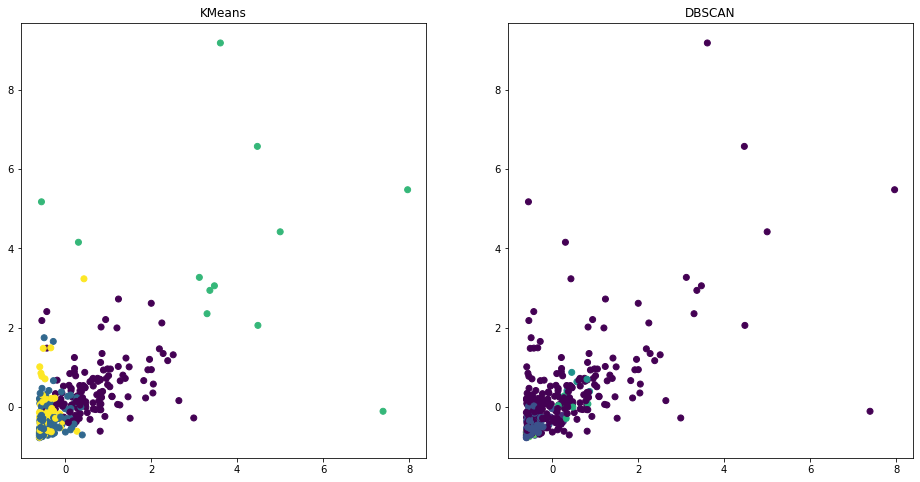

In [37]:
# Your code here:

X = customers_scale["Detergents_Paper"]
y = customers_scale["Milk"]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.scatter(X, y, c=customers_scale["labels"])
ax1.set_title("KMeans")

ax2.scatter(X, y, c=customers_scale["labels_DBSCAN"])
ax2.set_title("DBSCAN")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

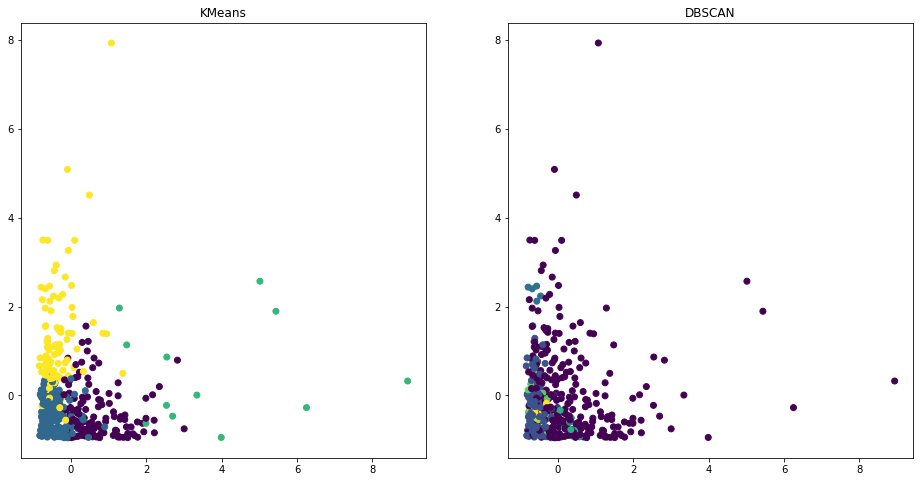

In [38]:
# Your code here:

X = customers_scale["Grocery"]
y = customers_scale["Fresh"]


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.scatter(X, y, c=customers_scale["labels"])
ax1.set_title("KMeans")

ax2.scatter(X, y, c=customers_scale["labels_DBSCAN"])
ax2.set_title("DBSCAN")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN')

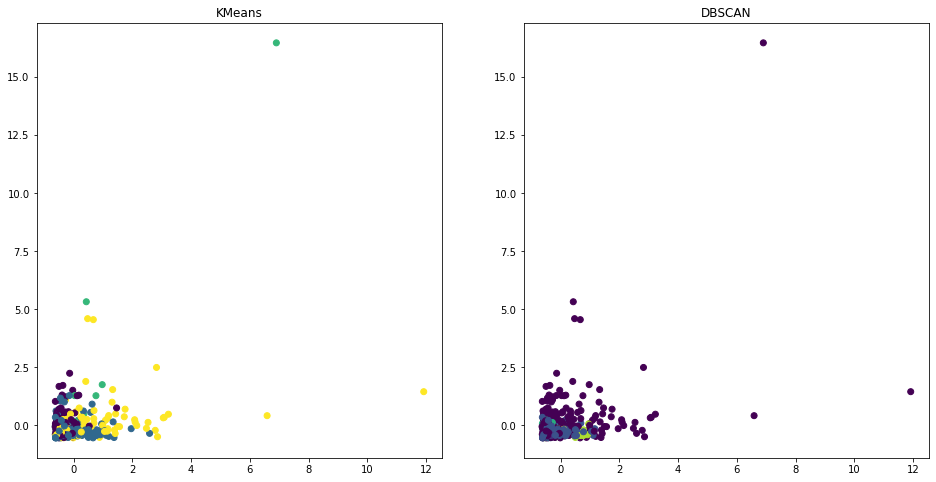

In [39]:
# Your code here:

X = customers_scale["Frozen"]
y = customers_scale["Delicassen"]


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.scatter(X, y, c=customers_scale["labels"])
ax1.set_title("KMeans")

ax2.scatter(X, y, c=customers_scale["labels_DBSCAN"])
ax2.set_title("DBSCAN")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [71]:
# Your code here:

customers_scale.groupby(["labels","labels_DBSCAN"]).mean()

Fresh      Milk   Grocery    Frozen  \
labels labels_DBSCAN                                           
0      -1             0.221054  0.017985 -0.016455  0.200595   
        0            -0.047439 -0.306575 -0.128764 -0.484978   
1       1            -0.227300 -0.533618 -0.582337 -0.193952   
        2             2.330913 -0.593472 -0.609298 -0.370277   
2       3            -0.763329  0.600725  0.412071 -0.507786   
        4            -0.707052  0.040639  0.253227 -0.428514   
        5            -0.171174 -0.548618 -0.609922 -0.321448   
        6            -0.409825 -0.522690 -0.587695  0.764752   
        7            -0.356662 -0.577682 -0.481258 -0.102396   
3      -1            -0.255901  1.886662  2.185942 -0.091136   

                      Detergents_Paper  Delicassen  Channel_1  Channel_2  \
labels labels_DBSCAN                                                       
0      -1                    -0.089162    0.108301   0.614286   0.385714   
        0                     0.142681   -0.449668   0.000000   1.000000   
1       1                    -0.500777   -0.277938   1.000000   0.000000   
        2                    -0.517654   -0.262725   1.000000   0.000000   
2       3                     0.608619   -0.337985   0.000000   1.000000   
        4                     0.376715    0.107053   0.000000   1.000000   
        5                    -0.534924   -0.303818   1.000000   0.000000   
        6                    -0.523890   -0.323478   1.000000   0.000000   
        7                    -0.557298   -0.207274   1.000000   0.000000   
3      -1                     2.171508    0.612279   0.022222   0.977778   

                      Region_1  Region_2  Region_3  
labels labels_DBSCAN                                
0      -1             0.200000  0.161905  0.638095  
        0             0.000000  0.000000  1.000000  
1       1             0.000000  0.000000  1.000000  
        2             0.000000  0.000000  1.000000  
2       3             0.000000  0.000000  1.000000  
        4             0.000000  0.000000  1.000000  
        5             1.000000  0.000000  0.000000  
        6             1.000000  0.000000  0.000000  
        7             0.000000  1.000000  0.000000  
3      -1             0.155556  0.177778  0.666667

Which algorithm appears to perform better?

In [ ]:
# Your observations here
# KMeans porque en algunas de las comparaciones por columnas sí se ven algunos grupos un poco más diferenciados

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here


In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here